In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import os
PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
print(PROJ_ROOT)

/home/neha/Desktop/code/ML/Kaggle/googleanalytics


In [5]:
x = pd.read_csv('../data/processed/user_feaures_20170501.csv',dtype={'fullVisitorId': 'str'})
y = pd.read_csv('../data/processed/user_predictions_20170501.csv',dtype={'fullVisitorId': 'str'})

In [22]:
x_recent = pd.read_csv('../data/processed/user_feaures_20170501_v3.csv',dtype={'fullVisitorId': 'str'})

In [23]:
x_recent.columns

Index(['fullVisitorId', 'date_min', 'date_max', 'visitNumber_max',
       'visitNumber_size', 'totals_bounces_sum', 'totals_bounces_mean',
       'totals_bounces_median', 'totals_hits_sum', 'totals_hits_min',
       'totals_hits_max', 'totals_hits_mean', 'totals_hits_median',
       'totals_newVisits_sum', 'totals_newVisits_mean',
       'totals_newVisits_median', 'totals_pageviews_sum',
       'totals_pageviews_min', 'totals_pageviews_max', 'totals_pageviews_mean',
       'totals_pageviews_median', 'totals_sessionQualityDim_sum',
       'totals_sessionQualityDim_min', 'totals_sessionQualityDim_max',
       'totals_sessionQualityDim_mean', 'totals_sessionQualityDim_median',
       'totals_timeOnSite_sum', 'totals_timeOnSite_min',
       'totals_timeOnSite_max', 'totals_timeOnSite_mean',
       'totals_timeOnSite_median', 'totals_totalTransactionRevenue_sum',
       'totals_totalTransactionRevenue_min',
       'totals_totalTransactionRevenue_max',
       'totals_totalTransactionRevenue_

In [21]:
x_recent['Unnamed: 0'].head()

0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64

In [3]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144049 entries, 0 to 144048
Data columns (total 2 columns):
fullVisitorId    144049 non-null object
target           144049 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [4]:
x.head()

,fullVisitorId,date_min,date_max,visitNumber_max,visitNumber_size,totals_bounces_sum,totals_bounces_mean,totals_bounces_median,totals_hits_sum,totals_hits_min,...,sess_date_dom_min,sess_date_dom_max,sess_date_dom_mean,sess_date_dom_median,sess_date_dom_var,sess_date_dom_std,date_diff,days_since_last_visit,days_since_first_visit,visit_frequency
0,0000049363351866189,2017-09-18,2017-09-19,3,3,3.0,1.0,1.0,3,1,...,18,19,18.333333,18.0,0.333333,0.57735,86400000000000,2246400000000000,2332800000000000,3.472222e-14
1,0000062267706107999,2017-07-09,2017-07-09,1,1,1.0,1.0,1.0,1,1,...,9,9,9.000000,9.0,NaN,NaN,0,8467200000000000,8467200000000000,inf
2,0000085059828173212,2017-07-19,2017-07-19,1,1,1.0,1.0,1.0,1,1,...,19,19,19.000000,19.0,NaN,NaN,0,7603200000000000,7603200000000000,inf
3,0000085840370633780,2017-09-08,2017-09-08,1,1,0.0,0.0,0.0,2,2,...,8,8,8.000000,8.0,NaN,NaN,0,3196800000000000,3196800000000000,inf
4,0000091131414287111,2017-09-28,2017-09-28,1,1,1.0,1.0,1.0,1,1,...,28,28,28.000000,28.0,NaN,NaN,0,1468800000000000,1468800000000000,inf


In [87]:
const_cols = [c for c in x.columns if x[c].nunique(dropna=False)==1 ]
const_cols

['totals_visits_min',
 'totals_visits_max',
 'totals_visits_mean',
 'totals_visits_median',
 'sess_date_hour_min',
 'sess_date_hour_max',
 'sess_date_hour_mean',
 'sess_date_hour_median']

In [88]:
train = pd.merge(x, y, on='fullVisitorId')

In [89]:
train.shape[0]

3369

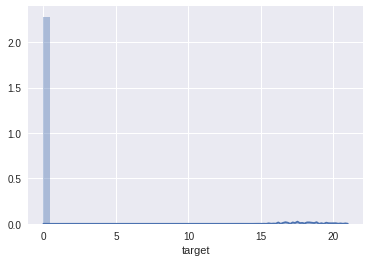

In [90]:
sns.distplot(train.target)

In [91]:
x.shape[0]

341388

In [92]:
train[train.target > 0].shape[0]

142

In [93]:
train.target.describe()

count    3369.000000
mean        0.760190
std         3.634004
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.994384
Name: target, dtype: float64

In [94]:
142/341388

0.0004159490081666608

In [95]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341388 entries, 0 to 341387
Data columns (total 65 columns):
fullVisitorId                          341388 non-null object
date_min                               341388 non-null object
date_max                               341388 non-null object
visitNumber_sum                        341388 non-null int64
visitNumber_mean                       341388 non-null float64
visitNumber_median                     341388 non-null float64
totals_bounces_sum                     341388 non-null float64
totals_bounces_mean                    198487 non-null float64
totals_bounces_median                  198487 non-null float64
totals_hits_sum                        341388 non-null int64
totals_hits_min                        341388 non-null int64
totals_hits_max                        341388 non-null int64
totals_hits_mean                       341388 non-null float64
totals_hits_median                     341388 non-null float64
totals_newVisits_s

In [96]:
cols = np.setdiff1d(x.columns.values, ['fullVisitorId', 'date_min', 'date_max'])

In [97]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x1 = StandardScaler().fit_transform(x[cols].fillna(0))
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x1)

In [98]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [99]:
principalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341388 entries, 0 to 341387
Data columns (total 2 columns):
pc1    341388 non-null float64
pc2    341388 non-null float64
dtypes: float64(2)
memory usage: 5.2 MB


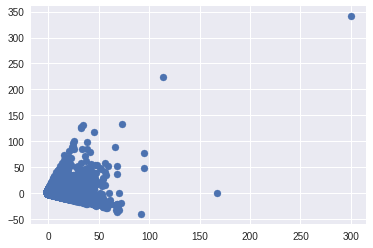

In [100]:
plt.scatter(principalDf.pc1, principalDf.pc2)

In [101]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148529 entries, 0 to 148528
Data columns (total 2 columns):
fullVisitorId    148529 non-null object
target           148529 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.3+ MB


In [102]:
traget_v = y[y.target > 0].fullVisitorId.values

In [103]:
traget_v

array(['820140226748860', '2833869866157625', '4245645024915245', ...,
       '9927330381225034775', '9939952603022711664',
       '9959898575919023676'], dtype=object)

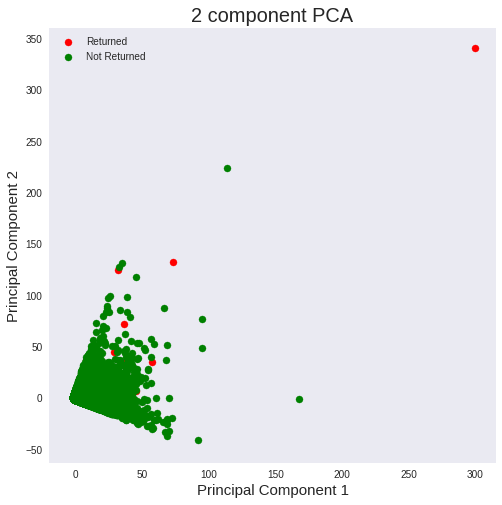

In [104]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(principalDf.loc[x.fullVisitorId.isin(traget_v), 'pc1']
               , principalDf.loc[x.fullVisitorId.isin(traget_v), 'pc2']
               , c = 'r'
               , s = 50)
ax.scatter(principalDf.loc[~x.fullVisitorId.isin(traget_v), 'pc1']
               , principalDf.loc[~x.fullVisitorId.isin(traget_v), 'pc2']
               , c = 'g'
               , s = 50)
ax.legend(['Returned', 'Not Returned'])
ax.grid()

In [105]:
x['fullVisitorId'].dtype.name

'object'

In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3369 entries, 0 to 3368
Data columns (total 66 columns):
fullVisitorId                          3369 non-null object
date_min                               3369 non-null object
date_max                               3369 non-null object
visitNumber_sum                        3369 non-null int64
visitNumber_mean                       3369 non-null float64
visitNumber_median                     3369 non-null float64
totals_bounces_sum                     3369 non-null float64
totals_bounces_mean                    1638 non-null float64
totals_bounces_median                  1638 non-null float64
totals_hits_sum                        3369 non-null int64
totals_hits_min                        3369 non-null int64
totals_hits_max                        3369 non-null int64
totals_hits_mean                       3369 non-null float64
totals_hits_median                     3369 non-null float64
totals_newVisits_sum                   3369 non-nu

In [60]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341388 entries, 0 to 341387
Data columns (total 65 columns):
fullVisitorId                          341388 non-null object
date_min                               341388 non-null object
date_max                               341388 non-null object
visitNumber_sum                        341388 non-null int64
visitNumber_mean                       341388 non-null float64
visitNumber_median                     341388 non-null float64
totals_bounces_sum                     341388 non-null float64
totals_bounces_mean                    198487 non-null float64
totals_bounces_median                  198487 non-null float64
totals_hits_sum                        341388 non-null int64
totals_hits_min                        341388 non-null int64
totals_hits_max                        341388 non-null int64
totals_hits_mean                       341388 non-null float64
totals_hits_median                     341388 non-null float64
totals_newVisits_s

In [107]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148529 entries, 0 to 148528
Data columns (total 2 columns):
fullVisitorId    148529 non-null object
target           148529 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.3+ MB


In [108]:
y.head()

,fullVisitorId,target
0,18809460226514,0.0
1,18998785589239,0.0
2,61214566278074,0.0
3,63394874386185,0.0
4,99242451401195,0.0


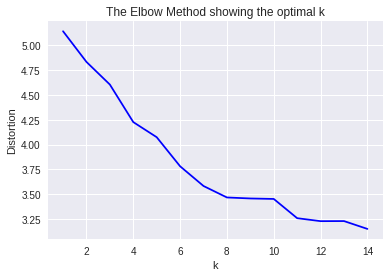

In [113]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


# k means determine k
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x1)
    distortions.append(sum(np.min(cdist(x1, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x1.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [129]:
kmeanModel = KMeans(n_clusters=8)
kmeanModel.fit(x1)
x['cluster'] = kmeanModel.predict(x1)

In [116]:
x.groupby('cluster').size()

cluster
0    91296
1     5036
2    93105
3    16527
4     4942
5    13194
6    27426
7    89862
dtype: int64

In [118]:
x['return'] = (x.fullVisitorId.isin(traget_v))*1

In [120]:
x['return'].sum()

140

In [130]:
x.groupby('cluster').agg({'return': ['count', 'sum']})

return    
          count sum
cluster            
0         97929   4
1        103470   5
2         13448  28
3         10150  14
4          5053  44
5         94700  19
6         16637  25
7             1   1

In [123]:
44/140

0.3142857142857143

In [128]:
38+14+7

59

In [15]:
import PIL